# Ether Transaction-Based Model

### Import Required Libraries

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import time
from etherscan import Etherscan
import custom_functions as cf
import datetime
import numpy as np

pd.options.display.float_format = '{:.3f}'.format

In [2]:
#API Key
eth = Etherscan('API Key')

### Transaction Acquisition

In [3]:
%%time
#Get Illict ETH Transactions: Etherscan API 

#illicit = pd.read_csv('all_illicit_addresses_generated.csv', index_col=0)
#illicit_addresses = illicit['Address'].tolist()
#illicit_addresses

#Define Block Range
#start_block = 1
#end_block = 18000000

#illicit_addresses = [i.lower() for i in illicit_addresses]
#illicit_txs_list = []
#for i in illicit_addresses:
#    try:
#        txs = eth.get_normal_txs_by_address(i, start_block, end_block, 'asc')
#        txs = [n for n in txs if n['isError'] == '0']
#    except:
#        txs = []
#    for i in txs:
#        illicit_txs_list.append(i)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.91 µs


In [4]:
#illicit_txs = pd.DataFrame(illicit_txs_list)
#illicit_txs.to_csv('all_illicit_transactions.csv')
illicit_txs = pd.read_csv('all_illicit_transactions.csv')
len(illicit_txs)

420484

In [5]:
#Gets Range of Illicit Transaction Timestamps
import datetime
illicit_txs.timeStamp.min()
illicit_txs.timeStamp.max()

datetime.datetime.fromtimestamp(int(illicit_txs.timeStamp.min()))
datetime.datetime.fromtimestamp(int(illicit_txs.timeStamp.max()))

eth.get_block_number_by_timestamp(illicit_txs.timeStamp.min(),'before')
eth.get_block_number_by_timestamp(illicit_txs.timeStamp.max(),'before')

1470134166

1693031063

datetime.datetime(2016, 8, 2, 3, 36, 6)

datetime.datetime(2023, 8, 25, 23, 24, 23)

'1997275'

'17997043'

In [6]:
#Get Legal Transactions Based on Block Range
import random
#%%time
#Get Legal ETH Transactions: Etherscan API
# Number of Iterations Estimation (Number of Illicit Transactions / Average Tx per block)
#iterations = int(420000/100)
#block_range = range(0,iterations)
#legal_txs_list = []
#missed_blocks = []
#block_timestamp_list = []

#for i in block_range:
#    chosen_block = random.randrange(1997275,17997043)
#    print('Block # ' + str(chosen_block) + " has been chosen.")
#    counter = 0
#    try:
#        block = eth.get_proxy_block_by_number(tag = hex(chosen_block))
#        block_txs = block['transactions']
#        for i in block_txs:
#            legal_txs_list.append(i)
#            block_timestamp_list.append(block['timestamp'])
#        counter += 1
#        print('Iteration ' + str(counter) + " has been processed.")
#    except:
#        print('Block # ' + str(chosen_block) + ' was unable to be captured.')
#        missed_blocks.append(str(counter))
#        time.sleep(20)
#        continue

In [7]:
#legal_txs_df = pd.DataFrame(legal_txs_list)
#legal_txs_df['timeStamp'] = block_timestamp_list
#legal_txs_df.to_csv('all_legal_transactions_v3_timestamps')
legal_txs = pd.read_csv('all_legal_transactions_v3_timestamps.csv', index_col=0)
legal_txs 

,blockHash,blockNumber,from,gas,gasPrice,hash,input,nonce,to,transactionIndex,value,type,chainId,v,r,s,maxFeePerGas,maxPriorityFeePerGas,accessList,timeStamp
0,0x8af16d2d93c55b37f631b856345037cb88f3f6a9f5f8...,0xa2464b,0x2fb9e343a8a2c4c4bcd4670ce61a14afe762c661,0x5208,0x1d1a94a200,0x377560e1d69b17d086d7b3924c50998718781d7e56ef...,0x,0xcb,0x42b210355761a5e13b20e28a9b31b96d497711c3,0x0,0x1b4fbd92b5f8000,0x0,0x1,0x25,0x80b0bc1f55d15255088c15d5b78b29f260372b5c90e2...,0x4c540873de0a6c48e543f55e54cc33f61bc79cf53565...,NaN,NaN,NaN,0x5f31c6ae
1,0x8af16d2d93c55b37f631b856345037cb88f3f6a9f5f8...,0xa2464b,0x06fda5b767c8b6171045e6549aab369a9dea36fc,0x51de0,0x1c5066dc7c,0xa726b798fab86c4cda6a0afa3d9949d9059501a72558...,0x000000d7000000000000000000000000000000000000...,0x5c61,0x7b2ef92fdecdf4a156365eb78c9e92b44588fe84,0x1,0x0,0x0,0x1,0x26,0x9fcf2ce42c2eb45f50d26257ade0fe03081ba0451d78...,0x23a1842b31492bce8dbe3da137f1b75176949ae458ba...,NaN,NaN,NaN,0x5f31c6ae
2,0x8af16d2d93c55b37f631b856345037cb88f3f6a9f5f8...,0xa2464b,0x00e43c0bfa2303310222e077ffa948bddf256848,0x2e3b4,0x1c5066d200,0xb20f892af8ea0f86557e55fd80985e54bf16e767a7a4...,0x8201aa3f000000000000000000000000c02aaa39b223...,0x36ee,0x1be21dd1fa2aced16656b7d765b88afa6853cc98,0x2,0x0,0x0,0x1,0x26,0x152fc0f9e5e5f1e8aa31bfc8d1f9abe300ae98ef38f5...,0x584c73e08d357cd2d1921c50fb81dcb94e3e22447a0c...,NaN,NaN,NaN,0x5f31c6ae
3,0x8af16d2d93c55b37f631b856345037cb88f3f6a9f5f8...,0xa2464b,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x249f0,0x1a3185c500,0xe0c473717fcddf63076021c8c7ec6e233c7113b39242...,0xa9059cbb00000000000000000000000072aafba75261...,0x8df9d3,0x514910771af9ca656af840dff83e8264ecf986ca,0x3,0x0,0x0,0x1,0x26,0xac3f263b50eb8bfd02e9a6644fedaff5ef061f8a55af...,0x31b627cf6572112c4cecced592c180c01cbcbd86509a...,NaN,NaN,NaN,0x5f31c6ae
4,0x8af16d2d93c55b37f631b856345037cb88f3f6a9f5f8...,0xa2464b,0x274f3c32c90517975e29dfc209a23f315c1e5fc7,0x55f0,0x1a3185c500,0x4c363a483f31f9de0eab65cece8cdb6a2208e0df73ed...,0x,0x65639,0xadfbe7ebca364a3a1616136cfd7e0ea3a34cd18b,0x4,0x1839f8e6a0664000,0x0,NaN,0x1c,0xa3eb9f2ef06455c24254736c7e17b3a9da870f4b1fa9...,0x25ba2d6130aa87054e6c4163e62ee8a69f26e531ac11...,NaN,NaN,NaN,0x5f31c6ae
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549240,0x754ed7c430cb9fafcec0fc65eb81c9c2b03c794cf615...,0xcb9061,0x29663f6c9077147e091646a1571604fa39f809b4,0x29810,0xff11a8eb9,0xa4a4c6c75640d027772d30a1f1c60b641e1f1546c5d8...,0xb1a1a882000000000000000000000000000000000000...,0x0,0x99c9fc46f92e8a1c0dec1b1747d010903e884be1,0xf8,0x71afd498d0000,0x2,0x1,0x0,0x7d3b254eff0195bf9c1564c86b099c1548d8771958bf...,0x7273aec7117be57bb9b3da9a363c912c2c45b2b92b85...,0x102ecca184,0x4effffc0,[],0x61588083
549241,0x754ed7c430cb9fafcec0fc65eb81c9c2b03c794cf615...,0xcb9061,0x6f98bb078bf780f92b4104dc2ee4ecc6fc107aa9,0x5208,0xff11a8eb9,0x1e7983e0854075cd4da7640cc85cbcea03e636f722d7...,0x,0x0,0xb8f185487c84375594c44273c1b76ff40290ae47,0xf9,0x11b7bd92c4e3c0,0x2,0x1,0x0,0x2fe94d91ddbb88edeb2d3d811a027ab498f7458cff38...,0x2aed79c81de5dd010aa8afac7079e920aa81874d7782...,0x102ecca184,0x4effffc0,[],0x61588083
549242,0x754ed7c430cb9fafcec0fc65eb81c9c2b03c794cf615...,0xcb9061,0x12a8a0b4c8c3f448131b999d683b55c668c1bed0,0x1eb70,0xfddb558f9,0xf608732efb31afe499e9573de61bf2420658ab655a93...,0xf3bd629a54524943455241544f505300000000000000...,0x3,0x8edf0426c0b0d10b50d72eb3f0c40985438cdaab,0xfa,0x4db732547630000,0x2,0x1,0x0,0x88df667267798173a4a2fe64a379fab48b70ca9ed2b0...,0x6b1f8c33ddf6dae901a0e1c487f2abd9f4e742e7a942...,0x1ab09a8246,0x3b9aca00,[],0x61588083
549243,0x754ed7c430cb9fafcec0fc65eb81c9c2b03c794cf615...,0xcb9061,0x44e58743f9855c9ba574b768e8efa0338a009e03,0xaee8,0xfddb558f9,0xa0e933347f83f0133bc3b6f5adc91fd870e0e9f2cb3e...,0x095ea7b30000000000000000000000001f2403da6a03...,0x91,0x3fcbe808d1f1a46764ab839b722beb16c48a80cb,0xfb,0x0,0x2,0x1,0x1,0x219fd63489709d992598acca74f7a5a95d2579d06799...,0x52a5ba8cd497b0b1faf7475db47e574b6145a7c156ac...,0x1ab09a8246,0x3b9aca00,[],0x6158808

### Data Wrangling

In [8]:
#Merge Dataframes & Drop Common Rows
#Ensure no overlap with illicit transactions 
res = pd.merge(illicit_txs['hash'],legal_txs['hash'], indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
len(res)

420379

In [9]:
illicit_txs['FLAG'] = 1
legal_txs['FLAG'] = 0

illicit_txs_trimmed = illicit_txs[['hash', 'FLAG','timeStamp','nonce', 'value', 'gas', 'gasPrice', 'input', 'transactionIndex']]
legal_txs_trimmed = legal_txs[['hash', 'FLAG','timeStamp','nonce', 'value', 'gas', 'gasPrice', 'input', 'transactionIndex']]
legal_txs_trimmed = legal_txs_trimmed[:420000]
#Clean Illicit 
#Convert Input Field into Binary Denoting Whether or Not there was Input Data
new_input = []
for i in illicit_txs_trimmed['input']:
    if i == '0x':
        new_input.append(0)
    else:
        new_input.append(1)
        
illicit_txs_trimmed['input'] = new_input

#Convert Value Field from Wei to Ethereum
new_value = []
for i in illicit_txs_trimmed['value']:
    new_value.append(cf.wei_converter(int(i)))

illicit_txs_trimmed['value'] = new_value

#Clean Legal
#Convert Input Field into Binary Denoting Whether or Not there was Input Data
new_input = []
for i in legal_txs_trimmed['input']:
    if i == '0x':
        new_input.append(0)
    else:
        new_input.append(1)
        
legal_txs_trimmed['input'] = new_input

#Convert Hexadecimal into Decimals
legal_txs_trimmed['nonce'] = [int(i,16) for i in legal_txs_trimmed['nonce']]
legal_txs_trimmed['value'] = [int(i,16) for i in legal_txs_trimmed['value']]
legal_txs_trimmed['gas'] = [int(i,16) for i in legal_txs_trimmed['gas']]
legal_txs_trimmed['gasPrice'] = [int(i,16) for i in legal_txs_trimmed['gasPrice']]
legal_txs_trimmed['transactionIndex'] = [int(i,16) for i in legal_txs_trimmed['transactionIndex']]
legal_txs_trimmed['timeStamp'] = [int(i,16) for i in legal_txs_trimmed['timeStamp']]

##Convert Value Field from Wei to Ethereum
legal_txs_trimmed['value'] = [cf.wei_converter(i) for i in legal_txs_trimmed['value']]

illicit_txs_trimmed
illicit_txs_trimmed['nonce'] = illicit_txs_trimmed['nonce'].astype(int)
illicit_txs_trimmed['gas'] = illicit_txs_trimmed['gas'].astype(int)
illicit_txs_trimmed['gasPrice'] = illicit_txs_trimmed['gasPrice'].astype(int)
illicit_txs_trimmed['transactionIndex'] = illicit_txs_trimmed['transactionIndex'].astype(int)

legal_txs_trimmed
legal_txs_trimmed['nonce'] = legal_txs_trimmed['nonce'].astype(int)
legal_txs_trimmed['gas'] = legal_txs_trimmed['gas'].astype(int)
legal_txs_trimmed['gasPrice'] = legal_txs_trimmed['gasPrice'].astype(int)
legal_txs_trimmed['transactionIndex'] = legal_txs_trimmed['transactionIndex'].astype(int)

/var/folders/2f/_dm57pgd7m7fnb0xgm506pbr0000gn/T/ipykernel_56033/2073901199.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_txs_trimmed['input'] = new_input
/var/folders/2f/_dm57pgd7m7fnb0xgm506pbr0000gn/T/ipykernel_56033/2073901199.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_txs_trimmed['value'] = new_value


,hash,FLAG,timeStamp,nonce,value,gas,gasPrice,input,transactionIndex
0,0x715a6e6551972d0700b8c0e0847fdd6bf012cf855208...,1,1677158939,1514,0.002,500000,31288047698,0,19
1,0x30c327125e3b39f28f2c78121fc4a875b55df6fc7c86...,1,1677158963,0,0.000,48561,28354303421,1,138
2,0x86f6ab03fb44f386bd4f4a4aed67a3d926d94269f2f2...,1,1533070589,0,0.559,21000,2000000000,0,27
3,0xe71cf9ede645595a4e025c5eb3de56a49713d3a3078f...,1,1533150153,0,0.551,21000,41000000000,0,3
4,0x1e79122507e9c17e57ed20795d22ee1527620fea0eac...,1,1533353315,462695,0.704,90000,22000000000,0,20
...,...,...,...,...,...,...,...,...,...
420479,0xe984ee7bf18fc7304a0ecf826f98284767aea726d263...,1,1539184605,10,0.000,250000,25000000000,1,6
420480,0x5573ea11a589291615a65e1d0fe807d63c8be0e42868...,1,1539184686,11,0.000,250000,25000000000,1,67
420481,0x54e9cf918fe07fd2b46e9b9443b0ac700a51c2925d1c...,1,1539186777,12,4.941,21000,99000000000,0,3
420482,0x8171ca4caad8fd06a70a406f55c1d651583e1a1e7b8a...,1,1677152963,750,0.002,500000,33980315579,0,42


/var/folders/2f/_dm57pgd7m7fnb0xgm506pbr0000gn/T/ipykernel_56033/2073901199.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_txs_trimmed['nonce'] = illicit_txs_trimmed['nonce'].astype(int)
/var/folders/2f/_dm57pgd7m7fnb0xgm506pbr0000gn/T/ipykernel_56033/2073901199.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illicit_txs_trimmed['gas'] = illicit_txs_trimmed['gas'].astype(int)
/var/folders/2f/_dm57pgd7m7fnb0xgm506pbr0000gn/T/ipykernel_56033/2073901199.py:50: SettingWithCopyWarning: 
A valu

,hash,FLAG,timeStamp,nonce,value,gas,gasPrice,input,transactionIndex
0,0x377560e1d69b17d086d7b3924c50998718781d7e56ef...,0,1597097646,203,0.123,21000,125000000000,0,0
1,0xa726b798fab86c4cda6a0afa3d9949d9059501a72558...,0,1597097646,23649,0.000,335328,121608002684,1,1
2,0xb20f892af8ea0f86557e55fd80985e54bf16e767a7a4...,0,1597097646,14062,0.000,189364,121608000000,1,2
3,0xe0c473717fcddf63076021c8c7ec6e233c7113b39242...,0,1597097646,9304531,0.000,150000,112500000000,1,3
4,0x4c363a483f31f9de0eab65cece8cdb6a2208e0df73ed...,0,1597097646,415289,1.746,22000,112500000000,0,4
...,...,...,...,...,...,...,...,...,...
419995,0x89610e9ef69f567261452e8471030a4a90ff6d2bd567...,0,1572110993,96587,0.000,100000,22000000000,1,2
419996,0xd1571a2e1cd96094918452480b0bb231e89e3cbade3c...,0,1572110993,96588,0.000,100000,22000000000,1,3
419997,0x22bcaab963fbdbe6ba3e33139f3d4abf789b5f16bdaf...,0,1572110993,96589,0.000,100000,22000000000,1,4
419998,0x52d3a4eb5f36e63438101d2600056464cd72a85c7ab9...,0,1572110993,96590,0.000,100000,22000000000,1,5


In [10]:
dfs = [illicit_txs_trimmed, legal_txs_trimmed]
all_transactions = pd.concat(dfs)
len(all_transactions)
all_transactions.dtypes
all_transactions['nonce'] = all_transactions['nonce'].astype(int)
all_transactions['gas'] = all_transactions['gas'].astype(int)
all_transactions['gasPrice'] = all_transactions['gasPrice'].astype(int)
all_transactions['transactionIndex'] = all_transactions['transactionIndex'].astype(int)
all_transactions.dtypes

840484

hash                 object
FLAG                  int64
timeStamp             int64
nonce                 int64
value               float64
gas                   int64
gasPrice              int64
input                 int64
transactionIndex      int64
dtype: object

hash                 object
FLAG                  int64
timeStamp             int64
nonce                 int64
value               float64
gas                   int64
gasPrice              int64
input                 int64
transactionIndex      int64
dtype: object

### Train Ether Transaction-Based Model

In [11]:
inital_column_drop = ['hash', 'FLAG']

X=all_transactions.drop(columns=inital_column_drop)
y=all_transactions['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Test Data
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

#Training Data
rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    125880
           1       0.93      0.93      0.93    126266

    accuracy                           0.93    252146
   macro avg       0.93      0.93      0.93    252146
weighted avg       0.93      0.93      0.93    252146

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    294120
           1       1.00      1.00      1.00    294218

    accuracy                           1.00    588338
   macro avg       1.00      1.00      1.00    588338
weighted avg       1.00      1.00      1.00    588338



array([0.29680279, 0.21904039, 0.10177063, 0.17378757, 0.10642006,
       0.03368207, 0.06849647])

Index(['timeStamp', 'nonce', 'value', 'gas', 'gasPrice', 'input',
       'transactionIndex'],
      dtype='object')

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 7 artists>

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30'),
  Text(0.35000000000000003, 0, '0.35')])

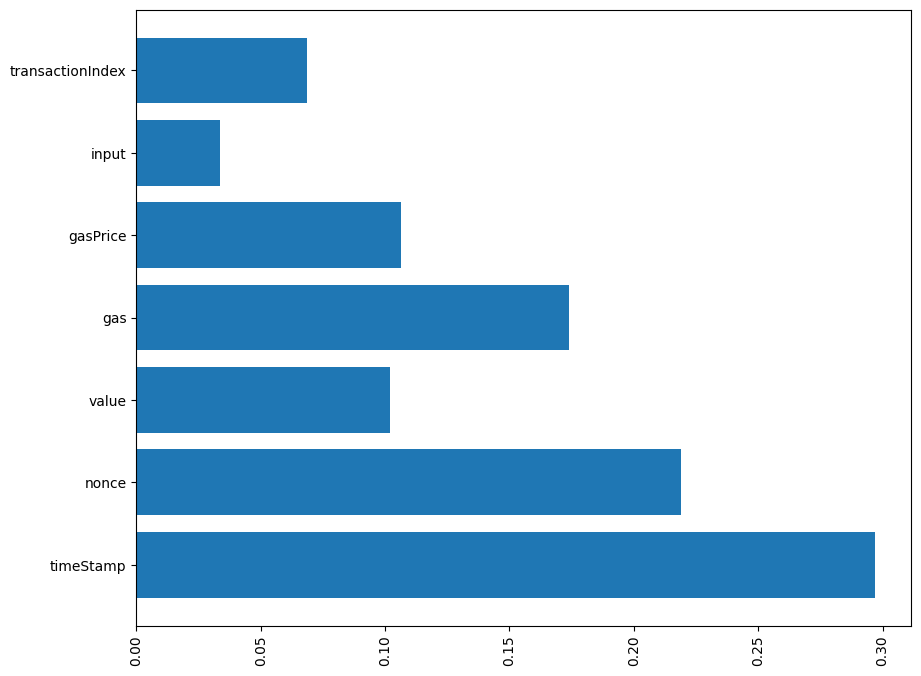

In [13]:
rfc.feature_importances_
X.columns

from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(X.columns, rfc.feature_importances_)
plt.xticks(rotation=90)

### Descriptive Statistics

In [14]:
cf.descriptive_statistics_transactions(legal_txs_trimmed, 'Legal', illicit_txs_trimmed, 'Illicit', 'mean')

,Features,Legal,Illicit
0,FLAG,0.000,1.000
1,timeStamp,1607302130.158,1589251402.342
2,nonce,1018104.986,58068.885
3,value,4.823,5.939
4,gas,187515.169,164449.349
5,gasPrice,54542682075.173,63252502804.944
6,input,0.606,0.390
7,transactionIndex,99.503,95.172


In [15]:
cf.descriptive_statistics_transactions(legal_txs_trimmed, 'Legal', illicit_txs_trimmed, 'Illicit', 'median')

,Features,Legal,Illicit
0,FLAG,0.000,1.000
1,timeStamp,1614760527.000,1600874677.000
2,nonce,275.000,29.000
3,value,0.000,0.009
4,gas,84277.000,46254.000
5,gasPrice,30000000000.000,40000000000.000
6,input,1.000,0.000
7,transactionIndex,81.000,77.000


### Split Train & Test by Timestamp

In [16]:
# Seperate Transactions By Timestamp

datetime.datetime.fromtimestamp(illicit_txs_trimmed.timeStamp.min())
datetime.datetime.fromtimestamp(illicit_txs_trimmed.timeStamp.max())

datetime.datetime.fromtimestamp(legal_txs_trimmed.timeStamp.min())
datetime.datetime.fromtimestamp(legal_txs_trimmed.timeStamp.max())

illicit_train = illicit_txs_trimmed[illicit_txs_trimmed.timeStamp < np.percentile(illicit_txs_trimmed.timeStamp, 70)]
len(illicit_train)
illicit_test = illicit_txs_trimmed[illicit_txs_trimmed.timeStamp > np.percentile(illicit_txs_trimmed.timeStamp, 70)]
len(illicit_test)

legal_train = legal_txs_trimmed[legal_txs_trimmed.timeStamp < np.percentile(legal_txs_trimmed.timeStamp, 70)]
len(legal_train)
legal_test = legal_txs_trimmed[legal_txs_trimmed.timeStamp > np.percentile(legal_txs_trimmed.timeStamp, 70)]
len(legal_test)

train_dfs = [illicit_train,legal_train]
all_train = pd.concat(train_dfs)

test_dfs = [illicit_test, legal_test]
all_test = pd.concat(test_dfs)

datetime.datetime(2016, 8, 2, 3, 36, 6)

datetime.datetime(2023, 8, 25, 23, 24, 23)

datetime.datetime(2016, 8, 7, 11, 49, 55)

datetime.datetime(2023, 8, 25, 2, 18, 35)

294339

126145

293984

125792

### Train New Model Split on Older Transactions

In [17]:
inital_column_drop = ['hash', 'FLAG', 'timeStamp']

X_train = all_train.drop(columns=inital_column_drop)
y_train = all_train['FLAG']
X_test = all_test.drop(columns=inital_column_drop)
y_test = all_test['FLAG']

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Test Data
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test, rfc_pred))

#Training Data
rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.56      0.83      0.67    125792
           1       0.67      0.35      0.46    126145

    accuracy                           0.59    251937
   macro avg       0.61      0.59      0.56    251937
weighted avg       0.61      0.59      0.56    251937

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    293984
           1       1.00      1.00      1.00    294339

    accuracy                           1.00    588323
   macro avg       1.00      1.00      1.00    588323
weighted avg       1.00      1.00      1.00    588323



array([0.27902694, 0.15798149, 0.22383082, 0.17118558, 0.03429473,
       0.13368045])

Index(['nonce', 'value', 'gas', 'gasPrice', 'input', 'transactionIndex'], dtype='object')

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 6 artists>

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0.0, 0, '0.00'),
  Text(0.05, 0, '0.05'),
  Text(0.1, 0, '0.10'),
  Text(0.15000000000000002, 0, '0.15'),
  Text(0.2, 0, '0.20'),
  Text(0.25, 0, '0.25'),
  Text(0.30000000000000004, 0, '0.30')])

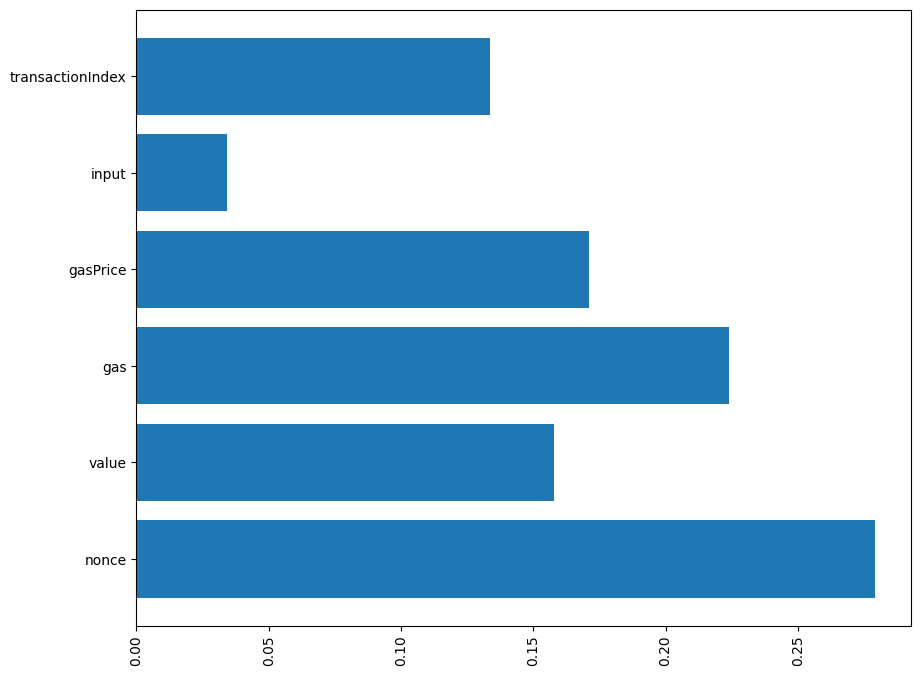

In [19]:
rfc.feature_importances_
X_train.columns

from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.barh(X_train.columns, rfc.feature_importances_)
plt.xticks(rotation=90)